In [1]:
# Install Pandas Data Reader
!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime as dtm

In [3]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [4]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-13,679.900024,644.049988,669.500000,647.210022,34255800.0,647.210022
2022-06-14,678.989990,635.210022,654.859985,662.669983,32662900.0,662.669983
2022-06-15,706.989990,654.450012,662.750000,699.000000,39710600.0,699.000000
2022-06-16,675.500000,626.080017,668.210022,639.299988,35796900.0,639.299988
2022-06-17,662.909973,639.590027,640.299988,650.280029,30810900.0,650.280029


<AxesSubplot:xlabel='Date'>

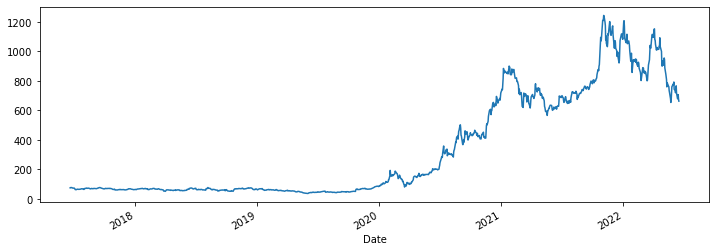

In [5]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

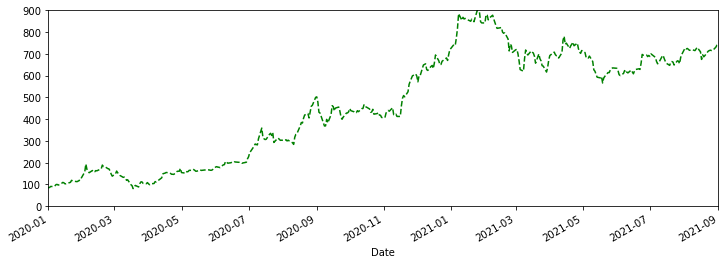

In [6]:
# xlim and ylim and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [7]:
df_tesla.index

DatetimeIndex(['2017-06-21', '2017-06-22', '2017-06-23', '2017-06-26',
               '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30',
               '2017-07-03', '2017-07-05',
               ...
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [8]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [9]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [10]:
import matplotlib.pyplot  as plt
%matplotlib inline

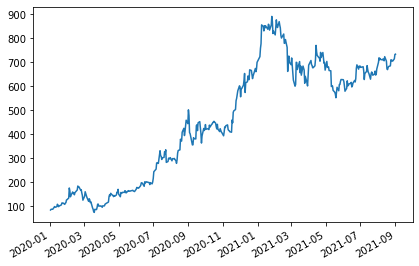

In [11]:
figure,axis=plt.subplots()
plt.tight_layout()
# Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [12]:
## Datetime Index

In [13]:
df_tesla=df_tesla.reset_index()

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [15]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [16]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999
...,...,...,...,...,...,...
2022-06-13,679.900024,644.049988,669.500000,647.210022,34255800.0,647.210022
2022-06-14,678.989990,635.210022,654.859985,662.669983,32662900.0,662.669983
2022-06-15,706.989990,654.450012,662.750000,699.000000,39710600.0,699.000000


In [17]:
from datetime import datetime

In [18]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [19]:
datetime.now()

datetime.datetime(2022, 6, 21, 14, 43, 10, 401881)

In [20]:
def add_num(num1,num2):
    return num1*num2

In [21]:
start_time=datetime.now()
num1=20000000
num2=30000000
for i in [1,2,3,4,5]:
    add_num(num1,num2)
end_time=datetime.now()
print(end_time-start_time)

0:00:00


## Time resampling

In [22]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999


In [23]:
# It gives in the specific year what is the minimal number in each column
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [24]:
# It gives in the specific year what is the maximum number in each column
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

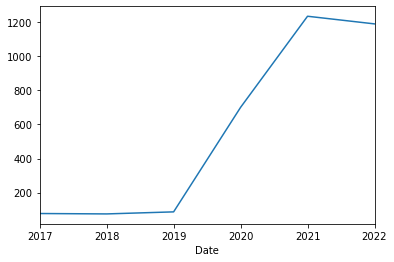

In [25]:
# plotting the above wrt to "Open"
df_tesla.resample(rule='A').max()['Open'].plot()

Rule A basically means Year End Frequency

In [26]:
# QS- Quarterly start frequency
df_tesla.resample(rule='QS').max()['High']

Date
2017-04-01      77.398003
2017-07-01      77.921997
2017-10-01      72.599998
2018-01-01      72.099998
2018-04-01      74.746002
2018-07-01      77.491997
2018-10-01      75.898003
2019-01-01      70.400002
2019-04-01      59.234001
2019-07-01      53.214001
2019-10-01      87.061996
2020-01-01     193.798004
2020-04-01     217.537994
2020-07-01     502.489990
2020-10-01     718.719971
2021-01-01     900.400024
2021-04-01     780.789978
2021-07-01     799.000000
2021-10-01    1243.489990
2022-01-01    1208.000000
2022-04-01    1152.869995
Freq: QS-JAN, Name: High, dtype: float64

<AxesSubplot:xlabel='Date'>

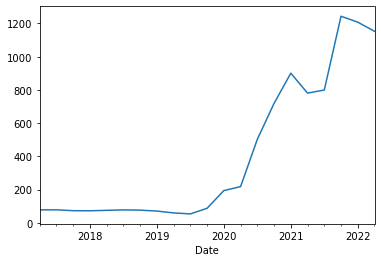

In [27]:
# Plotting above
df_tesla.resample(rule='QS').max()['High'].plot()

In [28]:
# BS- Business end frequency
df_tesla.resample(rule='BA').max()['High']

Date
2017-12-29      77.921997
2018-12-31      77.491997
2019-12-31      87.061996
2020-12-31     718.719971
2021-12-31    1243.489990
2022-12-30    1208.000000
Freq: BA-DEC, Name: High, dtype: float64

<AxesSubplot:xlabel='Date'>

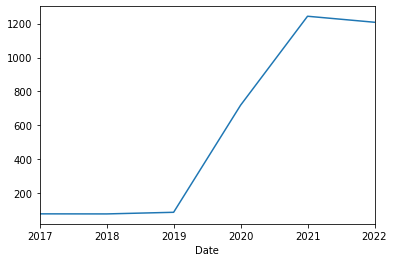

In [29]:
df_tesla.resample(rule='BA').max()['High'].plot()

In [30]:
# Business getting started
df_tesla.resample(rule='BQS').max()['High']

Date
2017-04-03      77.398003
2017-07-03      77.921997
2017-10-02      72.599998
2018-01-01      72.099998
2018-04-02      74.746002
2018-07-02      77.491997
2018-10-01      75.898003
2019-01-01      70.400002
2019-04-01      59.234001
2019-07-01      53.214001
2019-10-01      87.061996
2020-01-01     193.798004
2020-04-01     217.537994
2020-07-01     502.489990
2020-10-01     718.719971
2021-01-01     900.400024
2021-04-01     780.789978
2021-07-01     799.000000
2021-10-01    1243.489990
2022-01-03    1208.000000
2022-04-01    1152.869995
Freq: BQS-JAN, Name: High, dtype: float64

<AxesSubplot:xlabel='Date'>

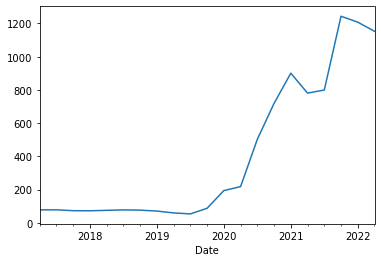

In [31]:
df_tesla.resample(rule='BQS').max()['High'].plot()

In [32]:
# plotting
df_tesla['Open'].resample(rule='BA').mean()

Date
2017-12-29     67.790209
2018-12-31     63.436693
2019-12-31     54.605627
2020-12-31    289.108428
2021-12-31    779.839286
2022-12-30    892.541034
Freq: BA-DEC, Name: Open, dtype: float64

<AxesSubplot:xlabel='Date'>

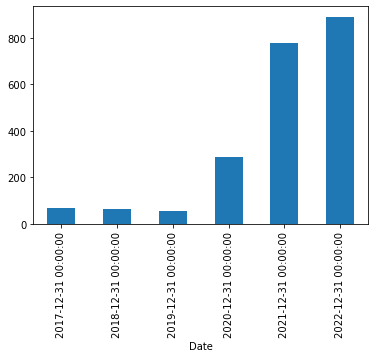

In [33]:
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

In [34]:
df_tesla['Open'].resample(rule='M').max()

Date
2017-06-30      77.337997
2017-07-31      74.047997
2017-08-31      73.040001
2017-09-30      76.050003
2017-10-31      71.396004
                 ...     
2022-02-28     935.210022
2022-03-31    1107.989990
2022-04-30    1136.300049
2022-05-31     939.020020
2022-06-30     755.159973
Freq: M, Name: Open, Length: 61, dtype: float64

<AxesSubplot:xlabel='Date'>

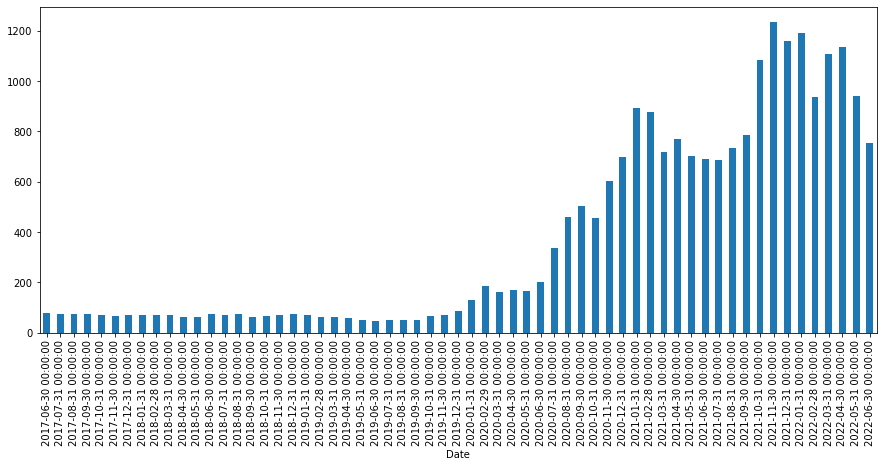

In [35]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [36]:
# Rolling
df_tesla['High'].rolling(6).mean().head(14)

Date
2017-06-21          NaN
2017-06-22          NaN
2017-06-23          NaN
2017-06-26          NaN
2017-06-27          NaN
2017-06-28    76.135667
2017-06-29    75.936000
2017-06-30    75.328332
2017-07-03    74.806998
2017-07-05    73.483331
2017-07-06    71.629664
2017-07-07    69.804998
2017-07-10    68.036332
2017-07-11    66.719999
Name: High, dtype: float64

In [37]:
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [38]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days rolling
Date,,,,,,,
2017-06-21,75.398003,73.603996,74.870003,75.279999,24616000.0,75.279999,NaN
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003,NaN
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002,NaN
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001,NaN
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999,NaN
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001,NaN
2017-06-29,74.199997,70.820000,74.122002,72.150002,41105000.0,72.150002,NaN
2017-06-30,73.353996,71.924004,72.741997,72.321999,29242500.0,72.321999,NaN
2017-07-03,74.269997,70.300003,74.047997,70.524002,31527000.0,70.524002,NaN


<AxesSubplot:xlabel='Date'>

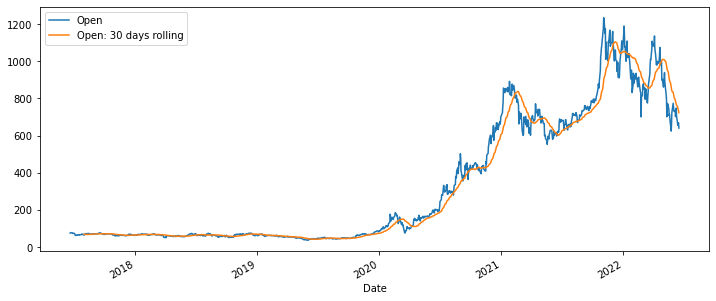

In [39]:
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,5))

## Assignment
1. Read the Microsoft data using Pandas Data Reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?

In [40]:
# Read the Microsoft data using Pandas Data Reader
df_msft=pdr.get_data_yahoo('MSFT')

In [41]:
df_msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-21,70.620003,69.940002,70.209999,70.269997,19891100.0,65.818657
2017-06-22,70.589996,69.709999,70.540001,70.260002,22965700.0,65.809303
2017-06-23,71.250000,69.919998,70.089996,71.209999,27617300.0,66.699127
2017-06-26,71.709999,70.440002,71.400002,70.529999,19607000.0,66.062195
2017-06-27,70.180000,69.180000,70.110001,69.209999,25215100.0,64.825821


In [42]:
df_msft.to_csv('microsoft.csv')

In [43]:
# Get the maximum price of the share from 2017 to 2022
df_msft['High'].resample(rule='A').max()

Date
2017-12-31     87.500000
2018-12-31    116.180000
2019-12-31    159.550003
2020-12-31    232.860001
2021-12-31    349.670013
2022-12-31    338.000000
Freq: A-DEC, Name: High, dtype: float64

In [44]:
# Which is the date of the highest price of the stock?
df_msft['High'].resample(rule='D').max()

Date
2017-06-21     70.620003
2017-06-22     70.589996
2017-06-23     71.250000
2017-06-24           NaN
2017-06-25           NaN
                 ...    
2022-06-13    249.020004
2022-06-14    245.740005
2022-06-15    255.300003
2022-06-16    247.419998
2022-06-17    250.500000
Freq: D, Name: High, Length: 1823, dtype: float64

In [45]:
# Which is the date of the lowest price of the stock?
df_msft['High'].resample(rule='D').min()

Date
2017-06-21     70.620003
2017-06-22     70.589996
2017-06-23     71.250000
2017-06-24           NaN
2017-06-25           NaN
                 ...    
2022-06-13    249.020004
2022-06-14    245.740005
2022-06-15    255.300003
2022-06-16    247.419998
2022-06-17    250.500000
Freq: D, Name: High, Length: 1823, dtype: float64

<AxesSubplot:xlabel='Date'>

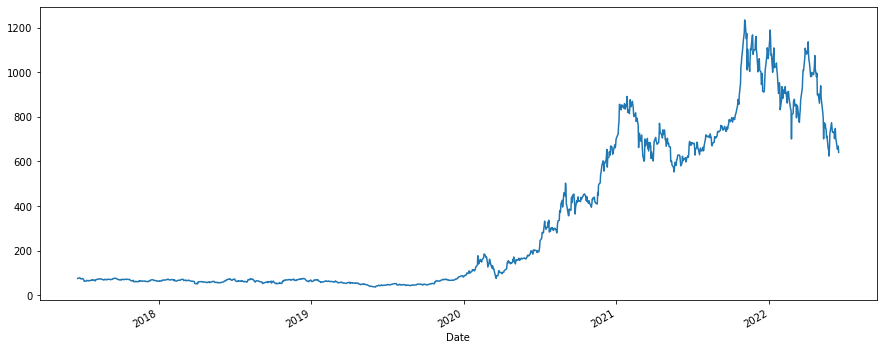

In [46]:
# Simple moving average -  To smootheing the graph
df_tesla['Open'].plot(figsize=(15,6))


In [47]:
df_tesla['Open: 10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(window=40,min_periods=1).mean()
df_tesla['Open: 50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()


<AxesSubplot:xlabel='Date'>

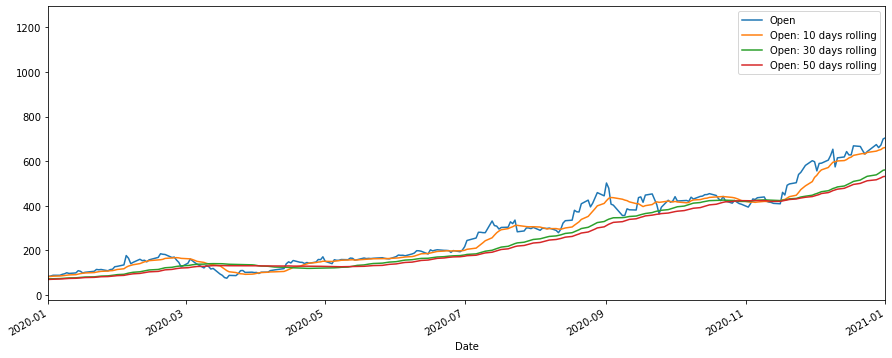

In [48]:
df_tesla[['Open','Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [49]:
## Expanding-- Cumulative Moving average
df_tesla['Open'].expanding().mean()

Date
2017-06-21     74.870003
2017-06-22     75.234001
2017-06-23     75.652667
2017-06-26     76.073999
2017-06-27     75.915199
                 ...    
2022-06-13    326.427184
2022-06-14    326.688883
2022-06-15    326.956448
2022-06-16    327.227930
2022-06-17    327.476795
Name: Open, Length: 1258, dtype: float64

<AxesSubplot:xlabel='Date'>

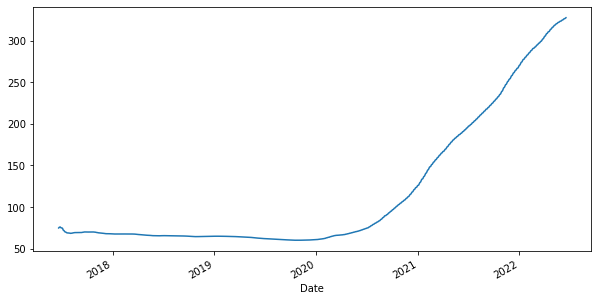

In [50]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [51]:
df_tesla['High'].ewm(alpha=0.1,adjust=False).mean().head(20)

Date
2017-06-21    75.398003
2017-06-22    75.558202
2017-06-23    75.742182
2017-06-26    75.906964
2017-06-27    75.844268
2017-06-28    75.694641
2017-06-29    75.545176
2017-06-30    75.326058
2017-07-03    75.220452
2017-07-05    74.643207
2017-07-06    73.594686
2017-07-07    72.575217
2017-07-10    71.676496
2017-07-11    71.054446
2017-07-12    70.611002
2017-07-13    70.181902
2017-07-14    69.732111
2017-07-17    69.300900
2017-07-18    68.953410
2017-07-19    68.691069
Name: High, dtype: float64

In [52]:
# EMA - Exponential moving average
df_tesla['EMA_0.1']=df_tesla['High'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

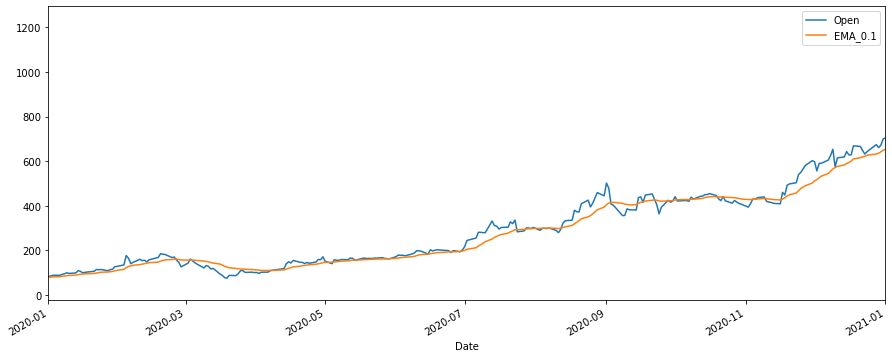

In [53]:
# alpha=0.1
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [54]:
#alpha=0.3
df_tesla['EMA_0.3']=df_tesla['High'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

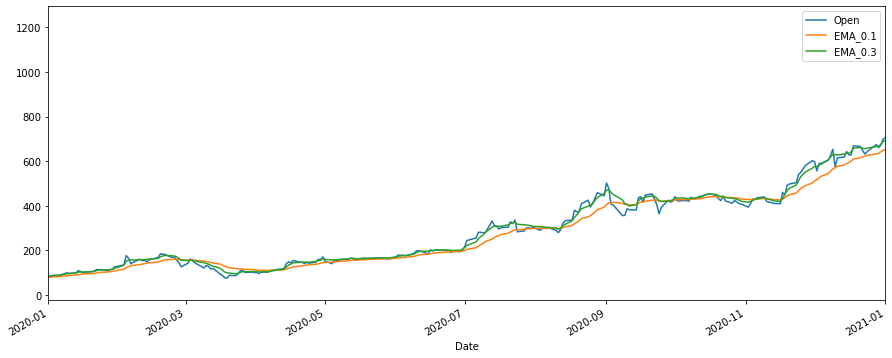

In [55]:
# alpha=0.3- smothening factor
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [56]:
# EWMA- exponential weighted moving average
#span = 5days
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

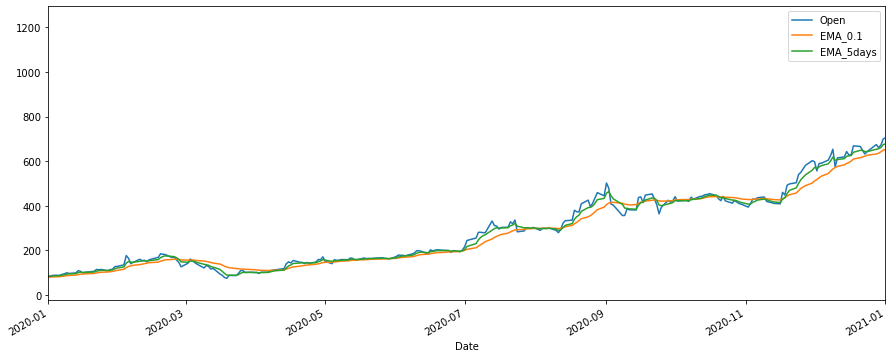

In [57]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## Arima

In [58]:
# Import dataset Air Passengers
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [59]:
df_airline=pd.read_csv(r'C:\Users\praty\Downloads\Live-Time-Series-main\Live-Time-Series-main\airline_passengers.csv')

In [60]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [61]:
# Check Null values
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [62]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [63]:
# Dropping that row
df_airline.dropna(axis=0,inplace=True)

In [64]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [65]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [66]:
# Coverting to Datetime 
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [67]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [68]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [69]:
# Set Month column to index
df_airline.set_index('Month',inplace=True)

In [70]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

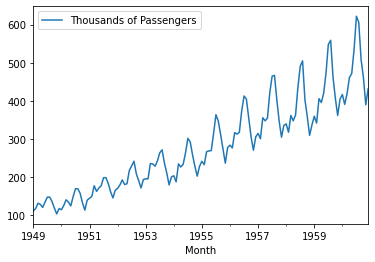

In [71]:
df_airline.plot()

This above graph is seasonal data, so it not stationary data

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
def adf_test(series):
    result=adfuller(series)
    #return result
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value : {}'.format(result[1]))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Reject the null hypothesis. Data has no unit root and it is stationary')
    else:
        print('Weak evidence against the null hypothesis, Accept the null hypothesis. Time series  has a unit root and indicates it is non stationary')

In [74]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060543
p- value : 0.9918802434376411
Weak evidence against the null hypothesis, Accept the null hypothesis. Time series  has a unit root and indicates it is non stationary


In [75]:
# To make it stationary using Differencing Technique
# Shift is used to shifed 1 position
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [76]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [77]:
# Passing the 'Passengers First Difference' value in function 'adf_test'
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
p- value : 0.054213290283824954
Weak evidence against the null hypothesis, Accept the null hypothesis. Time series  has a unit root and indicates it is non stationary


In [78]:
# Again using the Differencing Technique
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [79]:
# Passing the 'Passengers First Difference' value in function 'adf_test'
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468488
p- value : 2.7328918500143186e-29
Strong evidence against the null hypothesis, Reject the null hypothesis. Data has no unit root and it is stationary


Now the data is converted to stationary data

In [80]:
# since it is a seasonal data we have to for 12 times
# 12 months(Doing it for entire year)
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [81]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value : 0.011551493085514982
Strong evidence against the null hypothesis, Reject the null hypothesis. Data has no unit root and it is stationary


In [124]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

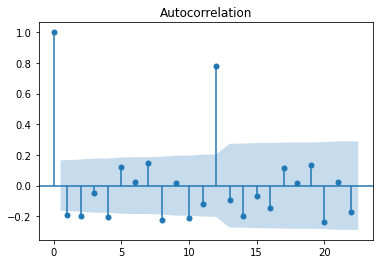

In [125]:
acf=plot_acf(df_airline['Passengers Second Difference'].dropna())

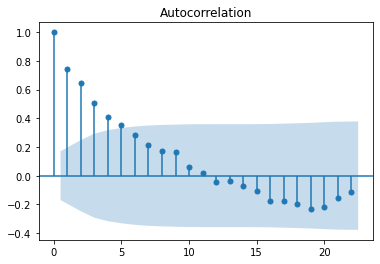

In [126]:
acf12=plot_acf(df_airline['Passengers 12 Difference'].dropna())

Using ACF we are performing Moving Average and we find the q value

C:\Users\praty\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


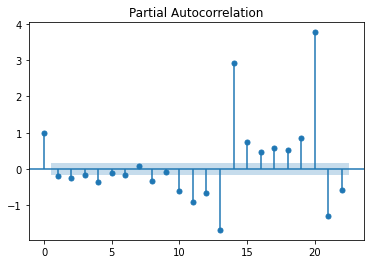

In [127]:
result=plot_pacf(df_airline['Passengers Second Difference'].dropna())

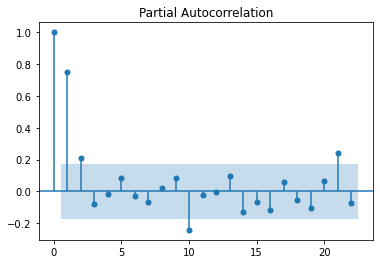

In [128]:
pacf12=plot_pacf(df_airline['Passengers 12 Difference'].dropna())

Using PACF we are performing auto regressing, and found the P value

In [129]:
# Split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [130]:
# Taking data from one time period to another time period
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [131]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [132]:
# prediction
pred_start_date=test_data.index[0]

In [134]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [135]:
pred_end_date=test_data.index[-1]

In [136]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [137]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [138]:
#Create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [96]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [140]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\praty\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\praty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [141]:
model_Arima_fit=model_ARIMA.fit()

In [142]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Tue, 21 Jun 2022   AIC                            775.563
Time:                                15:19:42   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [143]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [144]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [145]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [146]:
pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [147]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

<AxesSubplot:ylabel='Density'>

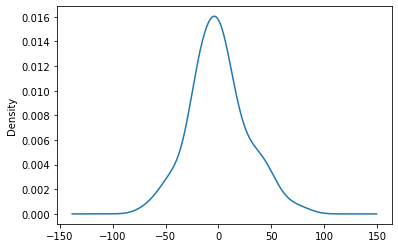

In [148]:
model_Arima_fit.resid.plot(kind='kde')

In [149]:
test_data['Predicted_ARIMA']=pred

<ipython-input-149-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

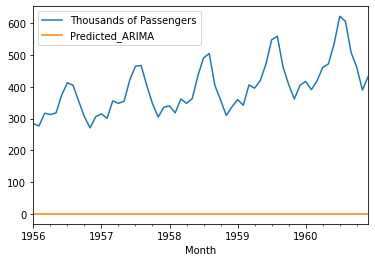

In [150]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

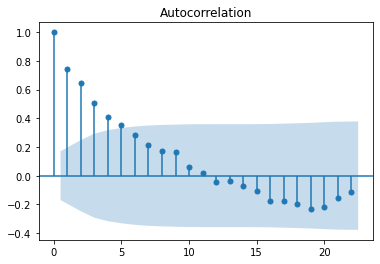

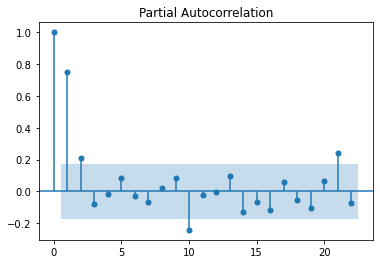

In [151]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [152]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [153]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\praty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\praty\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [154]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\praty\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Tue, 21 Jun 2022   AIC                            548.481
Time:                                     15:21:00   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.426829
1960-09-01,508.0,-98.0,-82.0,45.0,0.426829
1960-10-01,461.0,-47.0,51.0,54.0,0.426829
1960-11-01,390.0,-71.0,-24.0,28.0,0.426829
1960-12-01,432.0,42.0,113.0,27.0,0.426829


In [157]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [158]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

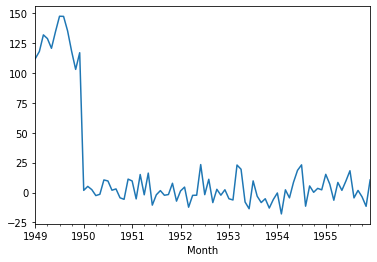

In [159]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

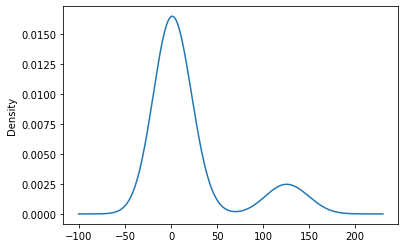

In [160]:
model_SARIMA_fit.resid.plot(kind='kde')

In [161]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-161-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [162]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829,NaN
1956-03-01,317.0,40.0,47.0,50.0,0.426829,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829,NaN
1956-05-01,318.0,5.0,9.0,48.0,0.426829,NaN
1956-06-01,374.0,56.0,51.0,59.0,0.426829,NaN
1956-07-01,413.0,39.0,-17.0,49.0,0.426829,403.396598
1956-08-01,405.0,-8.0,-47.0,58.0,0.426829,385.069542
1956-09-01,355.0,-50.0,-42.0,43.0,0.426829,349.443618


<AxesSubplot:xlabel='Month'>

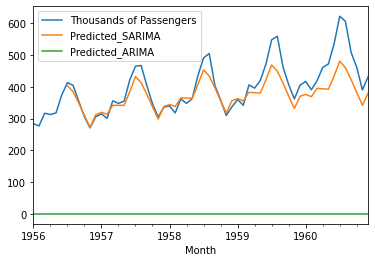

In [163]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

Arima Model doesnot give proper prediction for Seasonal data where SARIMA model gives